In [1]:
%matplotlib inline
import os  
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import statsmodels.api as sm  
import seaborn as sns 
sns.set_style('darkgrid')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore') 


In [2]:
########################################################
# 2. Define variables which we will use later in the script
########################################################
#s_roor_folder = "C:\Users\piush\Desktop\Dataset\data\"
#s_train_file = 'train.csv' 
l_parse_date_cols = ['dt_prediction_date', 'dt_target_date', 'dt_flight_date']
l_target_cols = ['num_pax_000_014_mins_before_sdt', 'num_pax_015_029_mins_before_sdt', 'num_pax_030_044_mins_before_sdt', 'num_pax_045_059_mins_before_sdt', 'num_pax_060_074_mins_before_sdt', 'num_pax_075_089_mins_before_sdt', 'num_pax_090_104_mins_before_sdt', 'num_pax_105_119_mins_before_sdt',  'num_pax_120_134_mins_before_sdt', 'num_pax_135_149_mins_before_sdt', 'num_pax_150_164_mins_before_sdt', 'num_pax_165_179_mins_before_sdt',  'num_pax_180_194_mins_before_sdt', 'num_pax_195_209_mins_before_sdt', 'num_pax_210_224_mins_before_sdt', 'num_pax_225_239_mins_before_sdt', 'num_pax_240plus_mins_before_sdt']


In [3]:
# Set some parameters to get good visuals - style to ggplot and size to 15,10
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 10)

In [8]:
df = pd.read_csv(r"C:\Users\piush\Desktop\Dataset\data_20161116\FullSet.csv", parse_dates = l_parse_date_cols)
df = df.set_index('id')

In [9]:
target = train[l_target_cols]

In [10]:
print("Prediction Date")
print(df['dt_prediction_date'].min())
print(df['dt_prediction_date'].max())

print("Flight Date")
print(df['dt_flight_date'].min())
print(df['dt_flight_date'].max())

print("Target Date")
print(df['dt_target_date'].min())
print(df['dt_target_date'].max())

Prediction Date
2013-01-01 00:00:00
2016-08-30 00:00:00
Flight Date
2012-07-01 00:00:00
2016-08-31 00:00:00
Target Date
2014-01-01 00:00:00
2016-08-31 00:00:00


In [11]:
print ("Shape of training set:", df.shape, "\n")
print ("Column Headers:", list(df.columns.values), "\n")
print (df.dtypes)

Shape of training set: (136194, 54) 

Column Headers: ['dt_prediction_date', 'dt_target_date', 'Source', 's_model_type', 'cat_case_type', 'cat_i_flightno', 'dt_flight_date', 'num_flight_year', 'num_flight_month', 'num_flight_weekofyear', 'num_flight_dayofweek', 'cat_sdt_hour', 'cat_i_airport', 'cat_i_city', 'cat_destination_group_id', 'cat_longhaul_ind', 'num_airport_other_ops', 'num_airport_other_flights', 'num_city_other_ops', 'num_city_other_flights', 'cat_s_plane_capacity', 'cat_flight_class_type_id', 'ord_leisure', 'ord_irish_residents', 'ord_trip_duration', 'ord_female', 'ord_party_size', 'ord_bag_checkin', 'ord_arrive_by_car', 'num_pax_000_014_mins_before_sdt', 'num_pax_015_029_mins_before_sdt', 'num_pax_030_044_mins_before_sdt', 'num_pax_045_059_mins_before_sdt', 'num_pax_060_074_mins_before_sdt', 'num_pax_075_089_mins_before_sdt', 'num_pax_090_104_mins_before_sdt', 'num_pax_105_119_mins_before_sdt', 'num_pax_120_134_mins_before_sdt', 'num_pax_135_149_mins_before_sdt', 'num_pax

In [13]:
df['s_model_type'] = df['s_model_type'].str.strip('_weeks').convert_objects(convert_numeric=True)

In [14]:
Source_g = {"TrainData" : 1, "TestData" : 2}
df["Source"] = df["Source"].apply(lambda s: Source_g.get(s))


In [15]:
cat_case_type_g = {"Target" : 1, "Expl" : 0}
df["cat_case_type"] = df["cat_case_type"].apply(lambda s: cat_case_type_g.get(s))

In [16]:
'051 - 100' '151 - 200' '101 - 150' '201 - 300' '300+' '001 - 050'
cat_s_plane_capacity_g = {"001 - 050" : 1, "051 - 100" : 2,"101 - 150" : 3, "151 - 200" : 4,"201 - 300" : 5, "300+" : 6}
df["cat_s_plane_capacity"] = df["cat_s_plane_capacity"].apply(lambda s: cat_s_plane_capacity_g.get(s))


In [17]:
df['s_model_type'] = df.loc[:, "s_model_type"].fillna(0.142)


In [18]:
df.head(5)

,dt_prediction_date,dt_target_date,Source,s_model_type,cat_case_type,cat_i_flightno,dt_flight_date,num_flight_year,num_flight_month,num_flight_weekofyear,...,num_pax_225_239_mins_before_sdt,num_pax_240plus_mins_before_sdt,TotalOnFlight,National Holiday,Not National Holiday,Rugby - Home,Rugby Away,PrimaryShcoolsOff,SecondarySchoolsOff,HolidaySeason
id,,,,,,,,,,,,,,,,,,,,,
10099,2015-07-17,2015-07-18,1,0.142,0,744,2015-07-15,2015,7,29,...,0.0,0.0,168,0,0,0,0,1,1,0
10099,2015-07-17,2015-07-18,1,0.142,0,744,2015-07-16,2015,7,29,...,0.0,0.0,154,0,0,0,0,1,1,0
10099,2015-07-17,2015-07-18,1,0.142,0,744,2015-07-17,2015,7,29,...,0.0,1.0,151,0,0,0,0,1,1,0
10099,2015-07-17,2015-07-18,1,0.142,1,744,2015-07-18,2015,7,29,...,2.0,3.0,177,0,0,0,0,1,1,0
101,2013-03-14,2014-03-14,1,52.000,1,10407,2014-03-14,2014,3,11,...,0.0,0.0,211,0,0,0,0,0,0,0


In [19]:
# Selecting date
mask = (df['dt_prediction_date'] > '2013-01-01') & (df['dt_prediction_date'] <= '2013-01-02')
df_date = df.loc[mask]

In [20]:
df_date

,dt_prediction_date,dt_target_date,Source,s_model_type,cat_case_type,cat_i_flightno,dt_flight_date,num_flight_year,num_flight_month,num_flight_weekofyear,...,num_pax_225_239_mins_before_sdt,num_pax_240plus_mins_before_sdt,TotalOnFlight,National Holiday,Not National Holiday,Rugby - Home,Rugby Away,PrimaryShcoolsOff,SecondarySchoolsOff,HolidaySeason
id,,,,,,,,,,,,,,,,,,,,,
2,2013-01-02,2014-01-02,1,52.0,0,10536,2012-11-08,2012,11,45,...,0.0,0.0,64,0,0,0,0,0,0,0
2,2013-01-02,2014-01-02,1,52.0,0,10536,2012-12-28,2012,12,52,...,0.0,0.0,160,0,0,0,0,1,1,1
2,2013-01-02,2014-01-02,1,52.0,0,10536,2012-12-29,2012,12,52,...,0.0,1.0,98,0,0,0,0,1,1,1
2,2013-01-02,2014-01-02,1,52.0,0,10536,2012-12-30,2012,12,52,...,0.0,0.0,116,0,0,0,0,1,1,1
2,2013-01-02,2014-01-02,1,52.0,0,10536,2012-12-31,2012,12,1,...,1.0,0.0,106,0,0,0,0,1,1,1
2,2013-01-02,2014-01-02,1,52.0,0,10536,2013-01-02,2013,1,1,...,0.0,0.0,122,0,0,0,0,1,1,1
2,2013-01-02,2014-01-02,1,52.0,1,10536,2014-01-02,2014,1,1,...,0.0,0.0,119,0,0,0,0,1,1,1


In [21]:
#sum specific columns
#http://stackoverflow.com/questions/25748683/python-pandas-sum-dataframe-rows-for-given-columns
col_list= list(df)
col_list



['dt_prediction_date',
 'dt_target_date',
 'Source',
 's_model_type',
 'cat_case_type',
 'cat_i_flightno',
 'dt_flight_date',
 'num_flight_year',
 'num_flight_month',
 'num_flight_weekofyear',
 'num_flight_dayofweek',
 'cat_sdt_hour',
 'cat_i_airport',
 'cat_i_city',
 'cat_destination_group_id',
 'cat_longhaul_ind',
 'num_airport_other_ops',
 'num_airport_other_flights',
 'num_city_other_ops',
 'num_city_other_flights',
 'cat_s_plane_capacity',
 'cat_flight_class_type_id',
 'ord_leisure',
 'ord_irish_residents',
 'ord_trip_duration',
 'ord_female',
 'ord_party_size',
 'ord_bag_checkin',
 'ord_arrive_by_car',
 'num_pax_000_014_mins_before_sdt',
 'num_pax_015_029_mins_before_sdt',
 'num_pax_030_044_mins_before_sdt',
 'num_pax_045_059_mins_before_sdt',
 'num_pax_060_074_mins_before_sdt',
 'num_pax_075_089_mins_before_sdt',
 'num_pax_090_104_mins_before_sdt',
 'num_pax_105_119_mins_before_sdt',
 'num_pax_120_134_mins_before_sdt',
 'num_pax_135_149_mins_before_sdt',
 'num_pax_150_164_mins_b

In [22]:
df_test_1 = df_date[['s_model_type',
 'cat_case_type',
 'num_flight_year',
 'num_flight_month',
 'num_flight_dayofweek',
 'cat_sdt_hour',
 'cat_i_airport',
 'cat_i_city',
 'cat_longhaul_ind',
 'cat_s_plane_capacity',
 'num_pax_000_014_mins_before_sdt',
 'num_pax_015_029_mins_before_sdt',
 'num_pax_030_044_mins_before_sdt',
 'num_pax_045_059_mins_before_sdt',
 'num_pax_060_074_mins_before_sdt',
 'num_pax_075_089_mins_before_sdt',
 'num_pax_090_104_mins_before_sdt',
 'num_pax_105_119_mins_before_sdt',
 'num_pax_120_134_mins_before_sdt',
 'num_pax_135_149_mins_before_sdt',
 'num_pax_150_164_mins_before_sdt',
 'num_pax_165_179_mins_before_sdt',
 'num_pax_180_194_mins_before_sdt',
 'num_pax_195_209_mins_before_sdt',
 'num_pax_210_224_mins_before_sdt',
 'num_pax_225_239_mins_before_sdt',
 'num_pax_240plus_mins_before_sdt',
 'TotalOnFlight',
 'National Holiday',
 'Not National Holiday',
 'Rugby - Home',
 'Rugby Away',
 'PrimaryShcoolsOff',
 'SecondarySchoolsOff',
 'HolidaySeason']]

In [23]:
df_test_1

,s_model_type,cat_case_type,num_flight_year,num_flight_month,num_flight_dayofweek,cat_sdt_hour,cat_i_airport,cat_i_city,cat_longhaul_ind,cat_s_plane_capacity,...,num_pax_225_239_mins_before_sdt,num_pax_240plus_mins_before_sdt,TotalOnFlight,National Holiday,Not National Holiday,Rugby - Home,Rugby Away,PrimaryShcoolsOff,SecondarySchoolsOff,HolidaySeason
id,,,,,,,,,,,,,,,,,,,,,
2,52.0,0,2012,11,3,6,10159,10003,0,4,...,0.0,0.0,64,0,0,0,0,0,0,0
2,52.0,0,2012,12,4,6,10169,10003,0,4,...,0.0,0.0,160,0,0,0,0,1,1,1
2,52.0,0,2012,12,5,17,10169,10003,0,4,...,0.0,1.0,98,0,0,0,0,1,1,1
2,52.0,0,2012,12,6,6,10169,10003,0,4,...,0.0,0.0,116,0,0,0,0,1,1,1
2,52.0,0,2012,12,0,9,10169,10003,0,4,...,1.0,0.0,106,0,0,0,0,1,1,1
2,52.0,0,2013,1,2,6,10169,10003,0,4,...,0.0,0.0,122,0,0,0,0,1,1,1
2,52.0,1,2014,1,3,17,10159,10003,0,4,...,0.0,0.0,119,0,0,0,0,1,1,1


In [25]:
target_row = df_test_1.loc[df_test_1['cat_case_type'] == 1]

In [27]:
train_row = df_test_1.loc[df_test_1['cat_case_type'] != 1]

In [28]:
train_row

,s_model_type,cat_case_type,num_flight_year,num_flight_month,num_flight_dayofweek,cat_sdt_hour,cat_i_airport,cat_i_city,cat_longhaul_ind,cat_s_plane_capacity,...,num_pax_225_239_mins_before_sdt,num_pax_240plus_mins_before_sdt,TotalOnFlight,National Holiday,Not National Holiday,Rugby - Home,Rugby Away,PrimaryShcoolsOff,SecondarySchoolsOff,HolidaySeason
id,,,,,,,,,,,,,,,,,,,,,
2,52.0,0,2012,11,3,6,10159,10003,0,4,...,0.0,0.0,64,0,0,0,0,0,0,0
2,52.0,0,2012,12,4,6,10169,10003,0,4,...,0.0,0.0,160,0,0,0,0,1,1,1
2,52.0,0,2012,12,5,17,10169,10003,0,4,...,0.0,1.0,98,0,0,0,0,1,1,1
2,52.0,0,2012,12,6,6,10169,10003,0,4,...,0.0,0.0,116,0,0,0,0,1,1,1
2,52.0,0,2012,12,0,9,10169,10003,0,4,...,1.0,0.0,106,0,0,0,0,1,1,1
2,52.0,0,2013,1,2,6,10169,10003,0,4,...,0.0,0.0,122,0,0,0,0,1,1,1


In [30]:
df_test_1.columns#[['cat_i_flightno','num_flight_month','num_flight_weekofyear', 'num_flight_dayofweek', 'cat_sdt_hour', 'cat_i_airport', 'cat_i_city', 'num_pax_105_119_mins_before_sdt', 'num_pax_135_149_mins_before_sdt','num_pax_135_149_mins_before_sdt']].groupby(['cat_i_flightno','num_flight_month','num_flight_weekofyear', 'num_flight_dayofweek', 'cat_sdt_hour', 'cat_i_airport', 'cat_i_city']).mean()
 

Index(['s_model_type', 'cat_case_type', 'num_flight_year', 'num_flight_month',
       'num_flight_dayofweek', 'cat_sdt_hour', 'cat_i_airport', 'cat_i_city',
       'cat_longhaul_ind', 'cat_s_plane_capacity',
       'num_pax_000_014_mins_before_sdt', 'num_pax_015_029_mins_before_sdt',
       'num_pax_030_044_mins_before_sdt', 'num_pax_045_059_mins_before_sdt',
       'num_pax_060_074_mins_before_sdt', 'num_pax_075_089_mins_before_sdt',
       'num_pax_090_104_mins_before_sdt', 'num_pax_105_119_mins_before_sdt',
       'num_pax_120_134_mins_before_sdt', 'num_pax_135_149_mins_before_sdt',
       'num_pax_150_164_mins_before_sdt', 'num_pax_165_179_mins_before_sdt',
       'num_pax_180_194_mins_before_sdt', 'num_pax_195_209_mins_before_sdt',
       'num_pax_210_224_mins_before_sdt', 'num_pax_225_239_mins_before_sdt',
       'num_pax_240plus_mins_before_sdt', 'TotalOnFlight', 'National Holiday',
       'Not National Holiday', 'Rugby - Home', 'Rugby Away',
       'PrimaryShcoolsOff', 'Seconda

In [31]:
df_new = df_test_1[['num_pax_000_014_mins_before_sdt', 'num_pax_015_029_mins_before_sdt',
       'num_pax_030_044_mins_before_sdt', 'num_pax_045_059_mins_before_sdt',
       'num_pax_060_074_mins_before_sdt', 'num_pax_075_089_mins_before_sdt',
       'num_pax_090_104_mins_before_sdt', 'num_pax_105_119_mins_before_sdt',
       'num_pax_120_134_mins_before_sdt', 'num_pax_135_149_mins_before_sdt',
       'num_pax_150_164_mins_before_sdt', 'num_pax_165_179_mins_before_sdt',
       'num_pax_180_194_mins_before_sdt', 'num_pax_195_209_mins_before_sdt',
       'num_pax_210_224_mins_before_sdt', 'num_pax_225_239_mins_before_sdt',
       'num_pax_240plus_mins_before_sdt', 'TotalOnFlight']]

In [70]:
df_mean = pd.DataFrame(df_new.mean(axis= 0).astype(int))


In [71]:
df_t = df_mean.transpose()

In [77]:
df_t

,num_pax_000_014_mins_before_sdt,num_pax_015_029_mins_before_sdt,num_pax_030_044_mins_before_sdt,num_pax_045_059_mins_before_sdt,num_pax_060_074_mins_before_sdt,num_pax_075_089_mins_before_sdt,num_pax_090_104_mins_before_sdt,num_pax_105_119_mins_before_sdt,num_pax_120_134_mins_before_sdt,num_pax_135_149_mins_before_sdt,num_pax_150_164_mins_before_sdt,num_pax_165_179_mins_before_sdt,num_pax_180_194_mins_before_sdt,num_pax_195_209_mins_before_sdt,num_pax_210_224_mins_before_sdt,num_pax_225_239_mins_before_sdt,num_pax_240plus_mins_before_sdt,TotalOnFlight
0,0,0,1,5,16,30,19,13,12,7,4,1,0,0,0,0,0,112


In [78]:
target_row

,num_pax_000_014_mins_before_sdt,num_pax_015_029_mins_before_sdt,num_pax_030_044_mins_before_sdt,num_pax_045_059_mins_before_sdt,num_pax_060_074_mins_before_sdt,num_pax_075_089_mins_before_sdt,num_pax_090_104_mins_before_sdt,num_pax_105_119_mins_before_sdt,num_pax_120_134_mins_before_sdt,num_pax_135_149_mins_before_sdt,num_pax_150_164_mins_before_sdt,num_pax_165_179_mins_before_sdt,num_pax_180_194_mins_before_sdt,num_pax_195_209_mins_before_sdt,num_pax_210_224_mins_before_sdt,num_pax_225_239_mins_before_sdt,num_pax_240plus_mins_before_sdt,TotalOnFlight,Key
id,,,,,,,,,,,,,,,,,,,
2,0.0,0.0,0.0,0.0,11.0,19.0,38.0,18.0,16.0,10.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,119,trail1


In [83]:
df_compare = df_t.append(target_row)

In [84]:
df_compare

,Key,TotalOnFlight,num_pax_000_014_mins_before_sdt,num_pax_015_029_mins_before_sdt,num_pax_030_044_mins_before_sdt,num_pax_045_059_mins_before_sdt,num_pax_060_074_mins_before_sdt,num_pax_075_089_mins_before_sdt,num_pax_090_104_mins_before_sdt,num_pax_105_119_mins_before_sdt,num_pax_120_134_mins_before_sdt,num_pax_135_149_mins_before_sdt,num_pax_150_164_mins_before_sdt,num_pax_165_179_mins_before_sdt,num_pax_180_194_mins_before_sdt,num_pax_195_209_mins_before_sdt,num_pax_210_224_mins_before_sdt,num_pax_225_239_mins_before_sdt,num_pax_240plus_mins_before_sdt
0,NaN,112,0.0,0.0,1.0,5.0,16.0,30.0,19.0,13.0,12.0,7.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0
2,trail1,119,0.0,0.0,0.0,0.0,11.0,19.0,38.0,18.0,16.0,10.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0


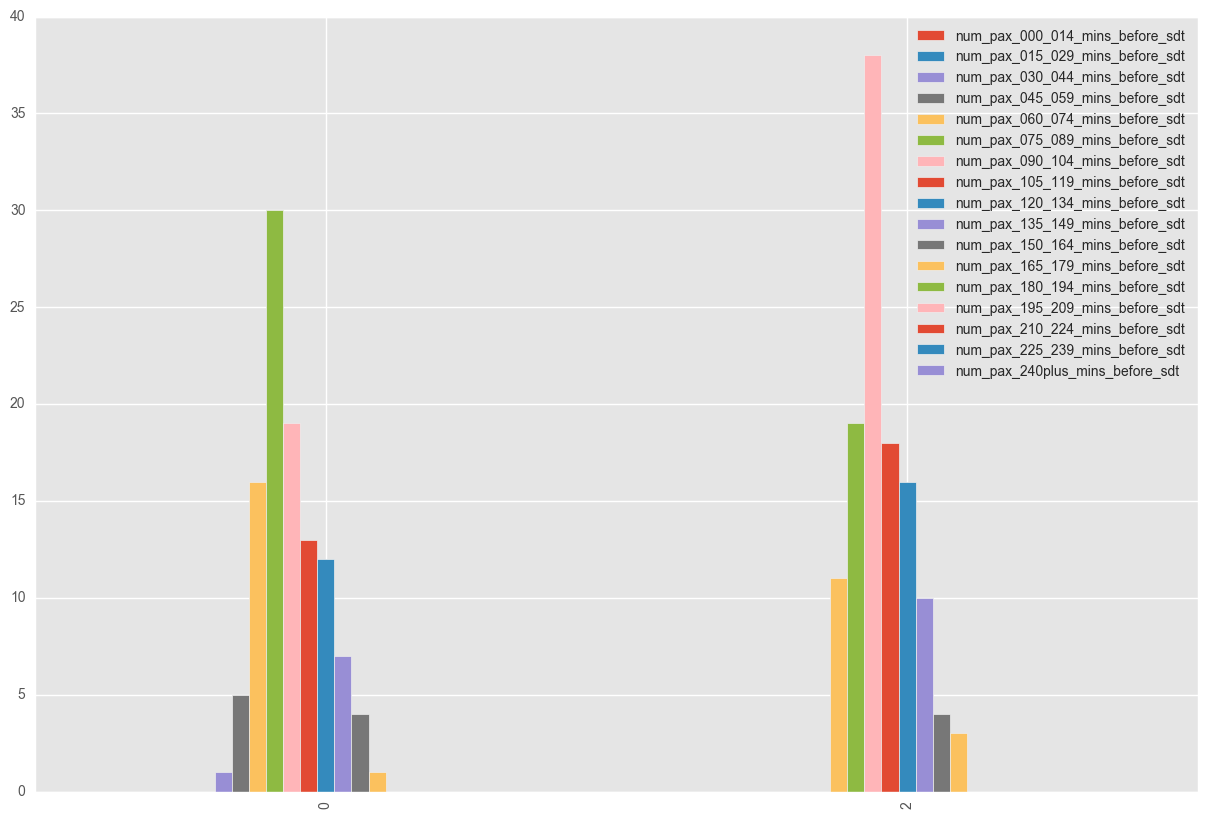

In [85]:
df_compare[['num_pax_000_014_mins_before_sdt', 'num_pax_015_029_mins_before_sdt',
       'num_pax_030_044_mins_before_sdt', 'num_pax_045_059_mins_before_sdt',
       'num_pax_060_074_mins_before_sdt', 'num_pax_075_089_mins_before_sdt',
       'num_pax_090_104_mins_before_sdt', 'num_pax_105_119_mins_before_sdt',
       'num_pax_120_134_mins_before_sdt', 'num_pax_135_149_mins_before_sdt',
       'num_pax_150_164_mins_before_sdt', 'num_pax_165_179_mins_before_sdt',
       'num_pax_180_194_mins_before_sdt', 'num_pax_195_209_mins_before_sdt',
       'num_pax_210_224_mins_before_sdt', 'num_pax_225_239_mins_before_sdt',
       'num_pax_240plus_mins_before_sdt']].plot(kind = 'bar')

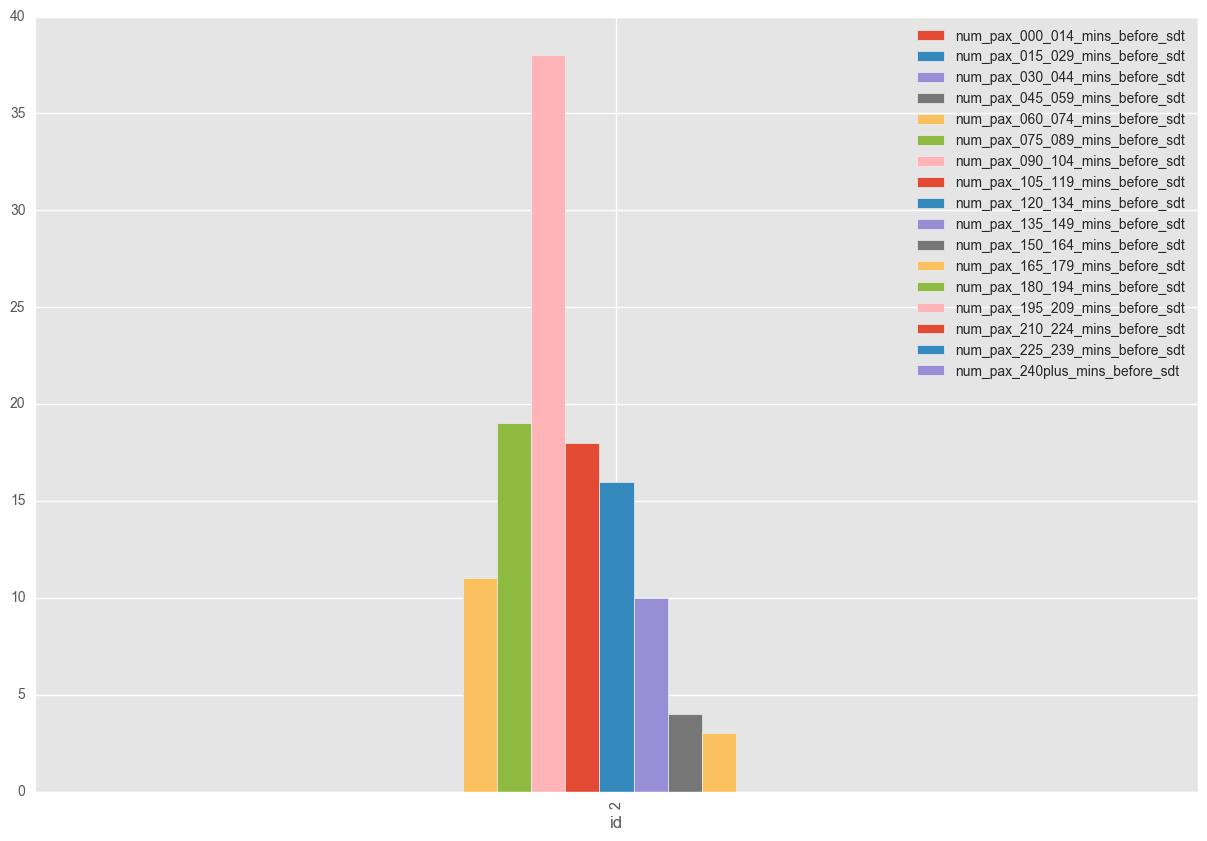

In [75]:
target_row[['num_pax_000_014_mins_before_sdt', 'num_pax_015_029_mins_before_sdt',
       'num_pax_030_044_mins_before_sdt', 'num_pax_045_059_mins_before_sdt',
       'num_pax_060_074_mins_before_sdt', 'num_pax_075_089_mins_before_sdt',
       'num_pax_090_104_mins_before_sdt', 'num_pax_105_119_mins_before_sdt',
       'num_pax_120_134_mins_before_sdt', 'num_pax_135_149_mins_before_sdt',
       'num_pax_150_164_mins_before_sdt', 'num_pax_165_179_mins_before_sdt',
       'num_pax_180_194_mins_before_sdt', 'num_pax_195_209_mins_before_sdt',
       'num_pax_210_224_mins_before_sdt', 'num_pax_225_239_mins_before_sdt',
       'num_pax_240plus_mins_before_sdt']].plot(kind = 'bar')

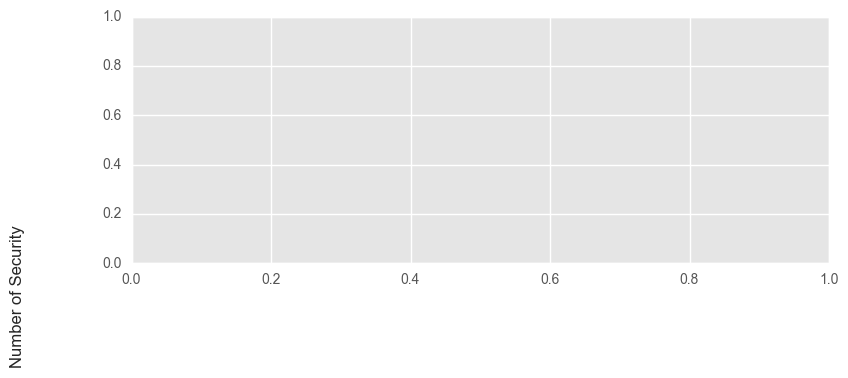

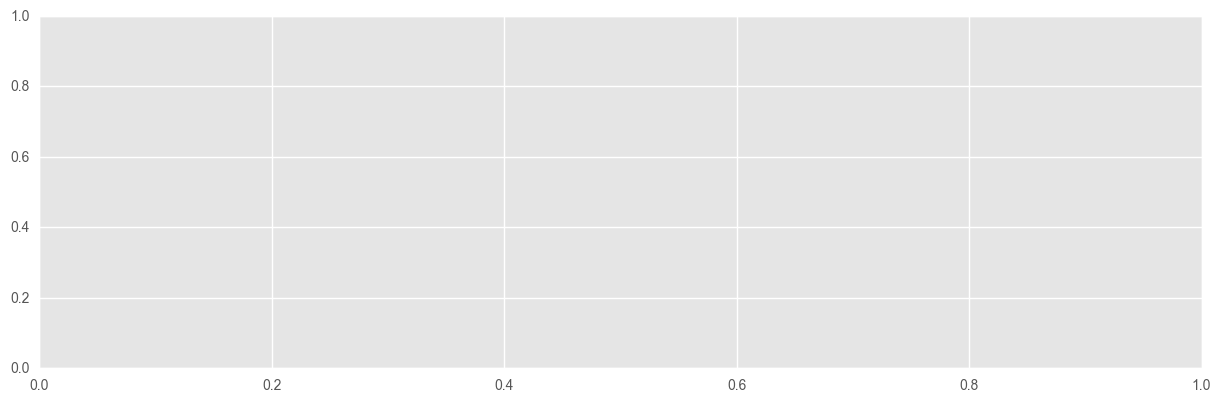

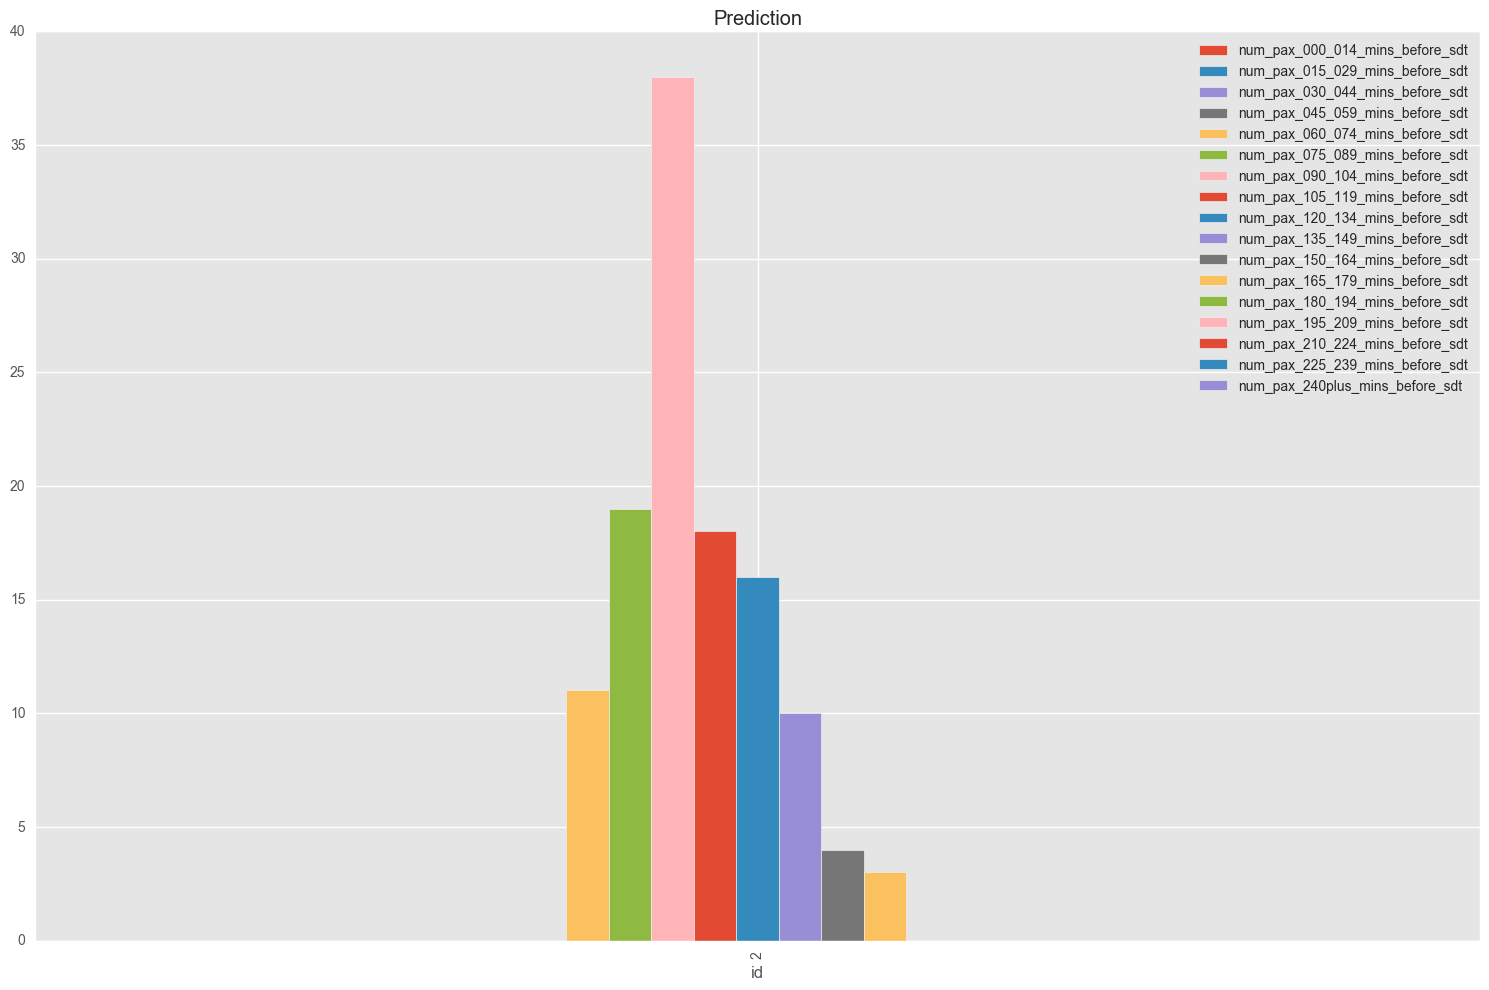

In [76]:
fig = plt.figure(2, figsize=(9, 7))
plt.subplot(211)
df_t[['num_pax_000_014_mins_before_sdt', 'num_pax_015_029_mins_before_sdt',
       'num_pax_030_044_mins_before_sdt', 'num_pax_045_059_mins_before_sdt',
       'num_pax_060_074_mins_before_sdt', 'num_pax_075_089_mins_before_sdt',
       'num_pax_090_104_mins_before_sdt', 'num_pax_105_119_mins_before_sdt',
       'num_pax_120_134_mins_before_sdt', 'num_pax_135_149_mins_before_sdt',
       'num_pax_150_164_mins_before_sdt', 'num_pax_165_179_mins_before_sdt',
       'num_pax_180_194_mins_before_sdt', 'num_pax_195_209_mins_before_sdt',
       'num_pax_210_224_mins_before_sdt', 'num_pax_225_239_mins_before_sdt',
       'num_pax_240plus_mins_before_sdt']].plot(kind = 'bar')
plt.title('Actual')

plt.subplot(212)
target_row[['num_pax_000_014_mins_before_sdt', 'num_pax_015_029_mins_before_sdt',
       'num_pax_030_044_mins_before_sdt', 'num_pax_045_059_mins_before_sdt',
       'num_pax_060_074_mins_before_sdt', 'num_pax_075_089_mins_before_sdt',
       'num_pax_090_104_mins_before_sdt', 'num_pax_105_119_mins_before_sdt',
       'num_pax_120_134_mins_before_sdt', 'num_pax_135_149_mins_before_sdt',
       'num_pax_150_164_mins_before_sdt', 'num_pax_165_179_mins_before_sdt',
       'num_pax_180_194_mins_before_sdt', 'num_pax_195_209_mins_before_sdt',
       'num_pax_210_224_mins_before_sdt', 'num_pax_225_239_mins_before_sdt',
       'num_pax_240plus_mins_before_sdt']].plot(kind = 'bar')
plt.title('Prediction')

fig.text(-0.01, 0.5, 'Number of Security', va = 'center', rotation = 'vertical', fontsize = 12)

plt.tight_layout()

In [50]:
plt.plot(target_row['num_pax_000_014_mins_before_sdt', 'num_pax_015_029_mins_before_sdt',
       'num_pax_030_044_mins_before_sdt', 'num_pax_045_059_mins_before_sdt',
       'num_pax_060_074_mins_before_sdt', 'num_pax_075_089_mins_before_sdt',
       'num_pax_090_104_mins_before_sdt', 'num_pax_105_119_mins_before_sdt',
       'num_pax_120_134_mins_before_sdt', 'num_pax_135_149_mins_before_sdt',
       'num_pax_150_164_mins_before_sdt', 'num_pax_165_179_mins_before_sdt',
       'num_pax_180_194_mins_before_sdt', 'num_pax_195_209_mins_before_sdt',
       'num_pax_210_224_mins_before_sdt', 'num_pax_225_239_mins_before_sdt',
       'num_pax_240plus_mins_before_sdt'])

KeyError: ('num_pax_000_014_mins_before_sdt', 'num_pax_015_029_mins_before_sdt', 'num_pax_030_044_mins_before_sdt', 'num_pax_045_059_mins_before_sdt', 'num_pax_060_074_mins_before_sdt', 'num_pax_075_089_mins_before_sdt', 'num_pax_090_104_mins_before_sdt', 'num_pax_105_119_mins_before_sdt', 'num_pax_120_134_mins_before_sdt', 'num_pax_135_149_mins_before_sdt', 'num_pax_150_164_mins_before_sdt', 'num_pax_165_179_mins_before_sdt', 'num_pax_180_194_mins_before_sdt', 'num_pax_195_209_mins_before_sdt', 'num_pax_210_224_mins_before_sdt', 'num_pax_225_239_mins_before_sdt', 'num_pax_240plus_mins_before_sdt')

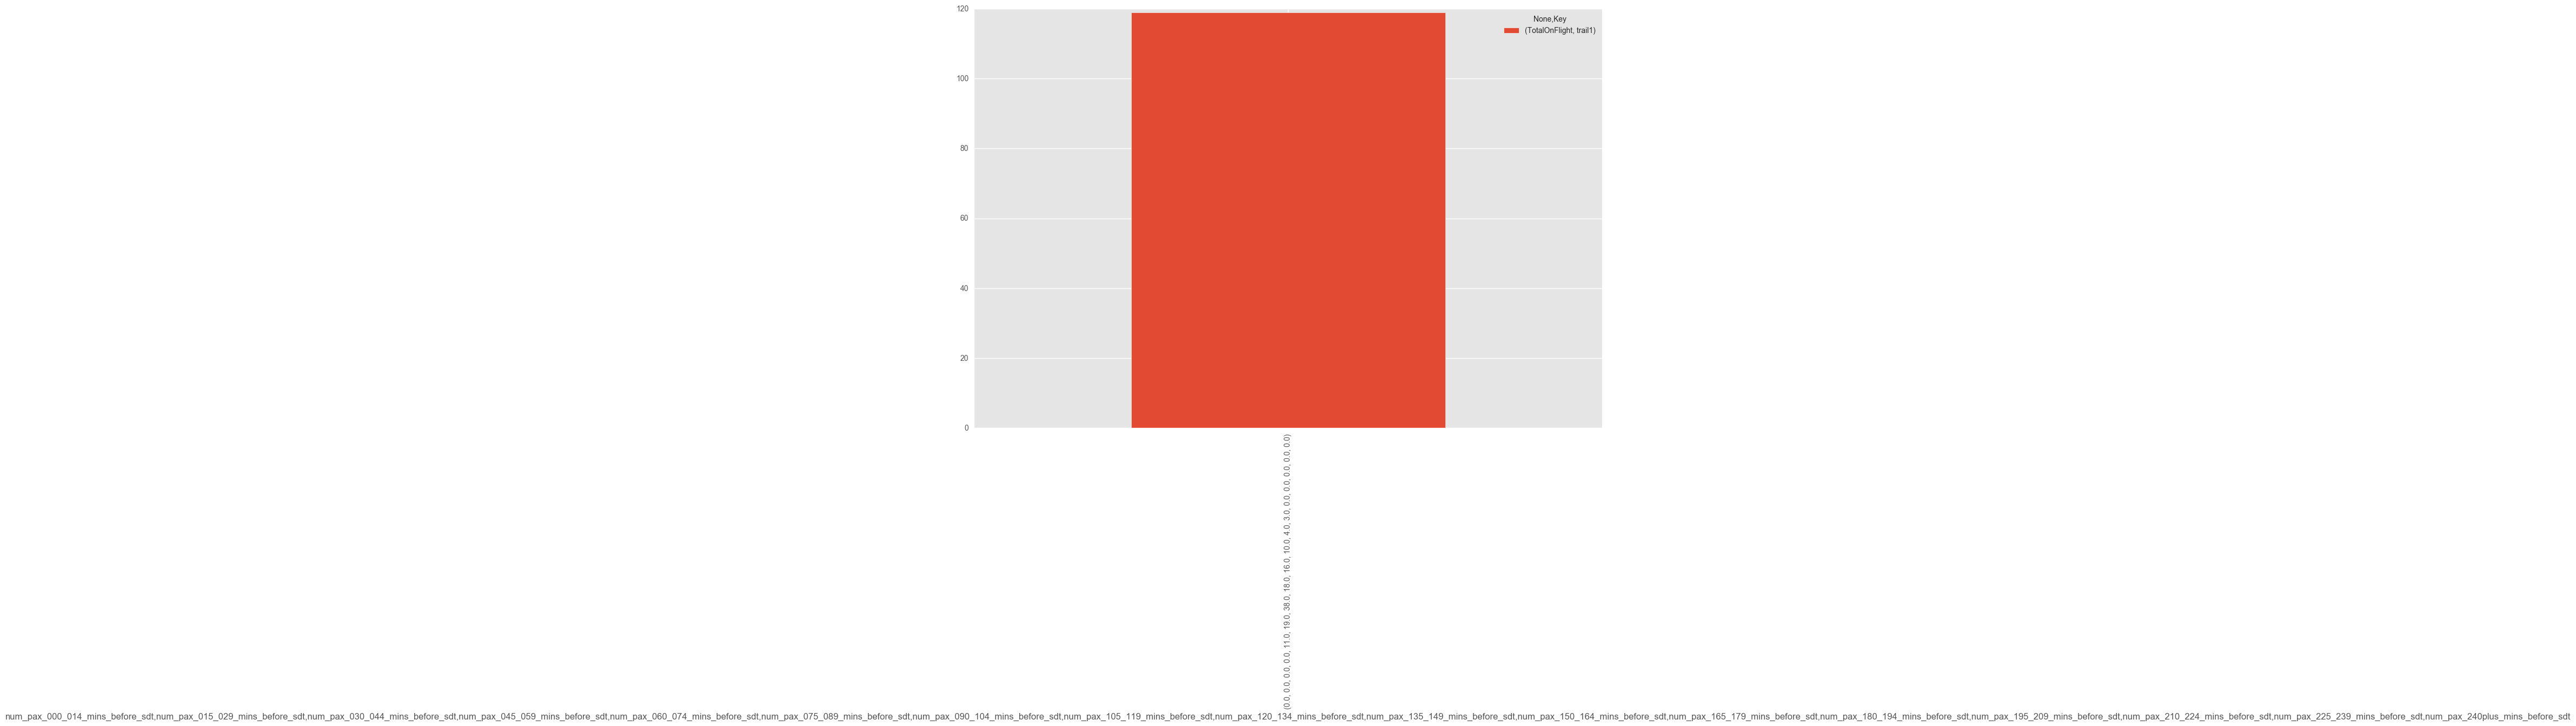

In [48]:
DFGroup = DF.groupby(['num_pax_000_014_mins_before_sdt', 'num_pax_015_029_mins_before_sdt',
       'num_pax_030_044_mins_before_sdt', 'num_pax_045_059_mins_before_sdt',
       'num_pax_060_074_mins_before_sdt', 'num_pax_075_089_mins_before_sdt',
       'num_pax_090_104_mins_before_sdt', 'num_pax_105_119_mins_before_sdt',
       'num_pax_120_134_mins_before_sdt', 'num_pax_135_149_mins_before_sdt',
       'num_pax_150_164_mins_before_sdt', 'num_pax_165_179_mins_before_sdt',
       'num_pax_180_194_mins_before_sdt', 'num_pax_195_209_mins_before_sdt',
       'num_pax_210_224_mins_before_sdt', 'num_pax_225_239_mins_before_sdt',
       'num_pax_240plus_mins_before_sdt','Key'])

DFGPlot = DFGroup.sum().unstack('Key').plot(kind='bar')

In [54]:
df_mean.

num_pax_000_014_mins_before_sdt     0
num_pax_015_029_mins_before_sdt     0
num_pax_030_044_mins_before_sdt     1
num_pax_045_059_mins_before_sdt     5
num_pax_060_074_mins_before_sdt    16
dtype: object

In [64]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X, target)
predictions = model.predict(test_new).astype(int)

In [84]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X, target)
predictions = model.predict(test_new).astype(int)

In [85]:
predictions

array([[0, 0, 3, ..., 0, 0, 0],
       [0, 0, 2, ..., 1, 0, 1],
       [0, 0, 2, ..., 1, 1, 0],
       ..., 
       [0, 3, 3, ..., 0, 0, 0],
       [0, 0, 2, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [86]:
df4 = predictions.reshape((-1,17))

In [87]:
df_predictions = pd.DataFrame({'num_pax_000_014_mins_before_sdt':df4[:,0],'num_pax_015_029_mins_before_sdt':df4[:,1],'num_pax_030_044_mins_before_sdt':df4[:,2],
                    'num_pax_045_059_mins_before_sdt':df4[:,3],'num_pax_060_074_mins_before_sdt':df4[:,4],'num_pax_075_089_mins_before_sdt':df4[:,5],
                    'num_pax_090_104_mins_before_sdt':df4[:,6],'num_pax_105_119_mins_before_sdt':df4[:,7],'num_pax_120_134_mins_before_sdt':df4[:,8],
                    'num_pax_135_149_mins_before_sdt':df4[:,9],'num_pax_150_164_mins_before_sdt':df4[:,10],'num_pax_165_179_mins_before_sdt':df4[:,11],
                    'num_pax_180_194_mins_before_sdt':df4[:,12],'num_pax_195_209_mins_before_sdt':df4[:,13],'num_pax_210_224_mins_before_sdt':df4[:,14],
                    'num_pax_225_239_mins_before_sdt':df4[:,15],'num_pax_240plus_mins_before_sdt':df4[:,16]})

In [88]:
submission = pd.DataFrame()
submission["id"] = test2.index

In [89]:
df6 = pd.concat([submission, df_predictions], axis=1)

In [90]:
df6.to_csv("attempt_PiushVaish_Random.csv",index = False)

### Visualize

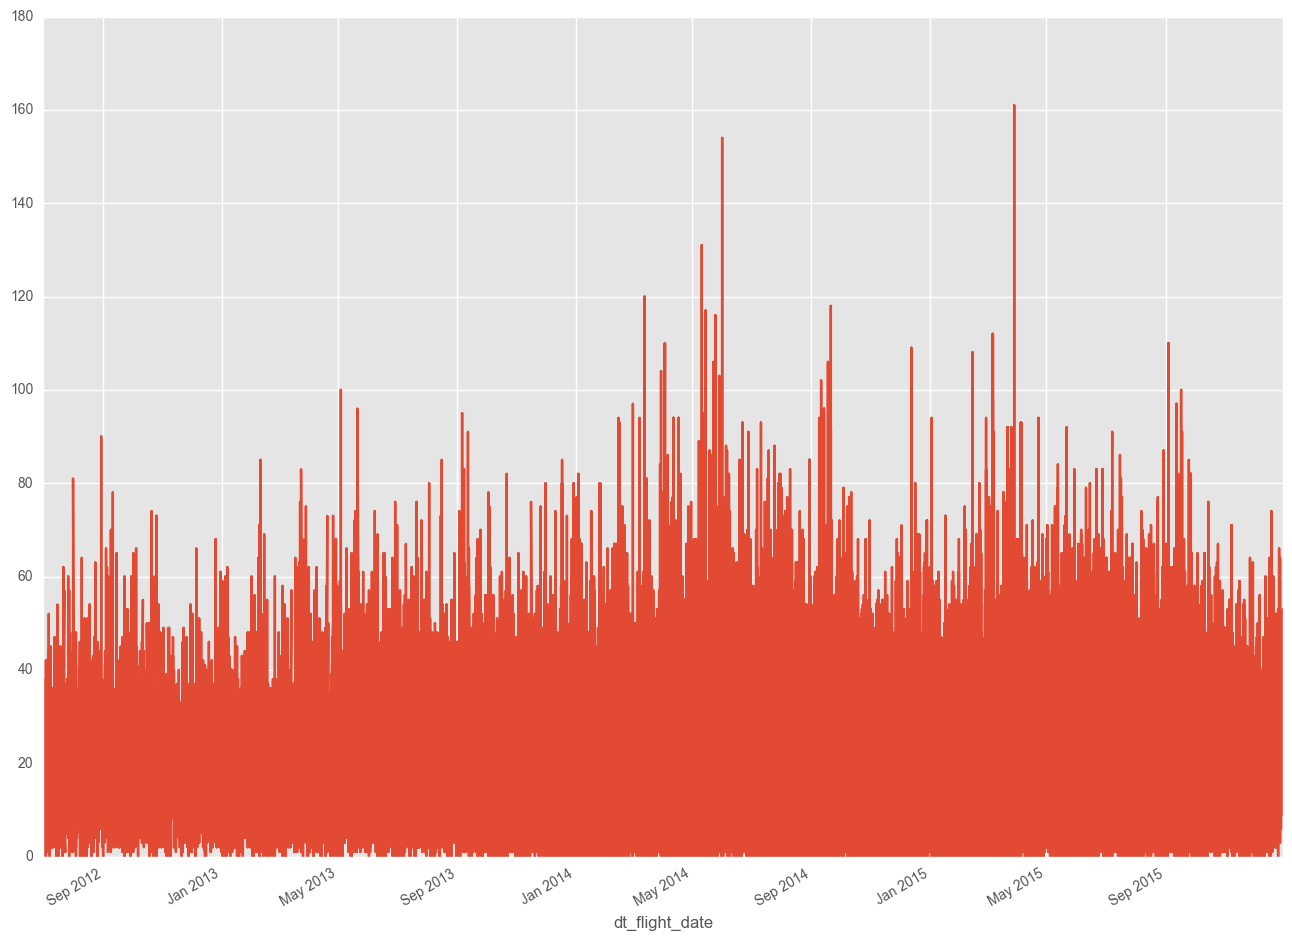

In [32]:
df['num_pax_090_104_mins_before_sdt'].avg(.plot(figsize=(16, 12)) 

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose

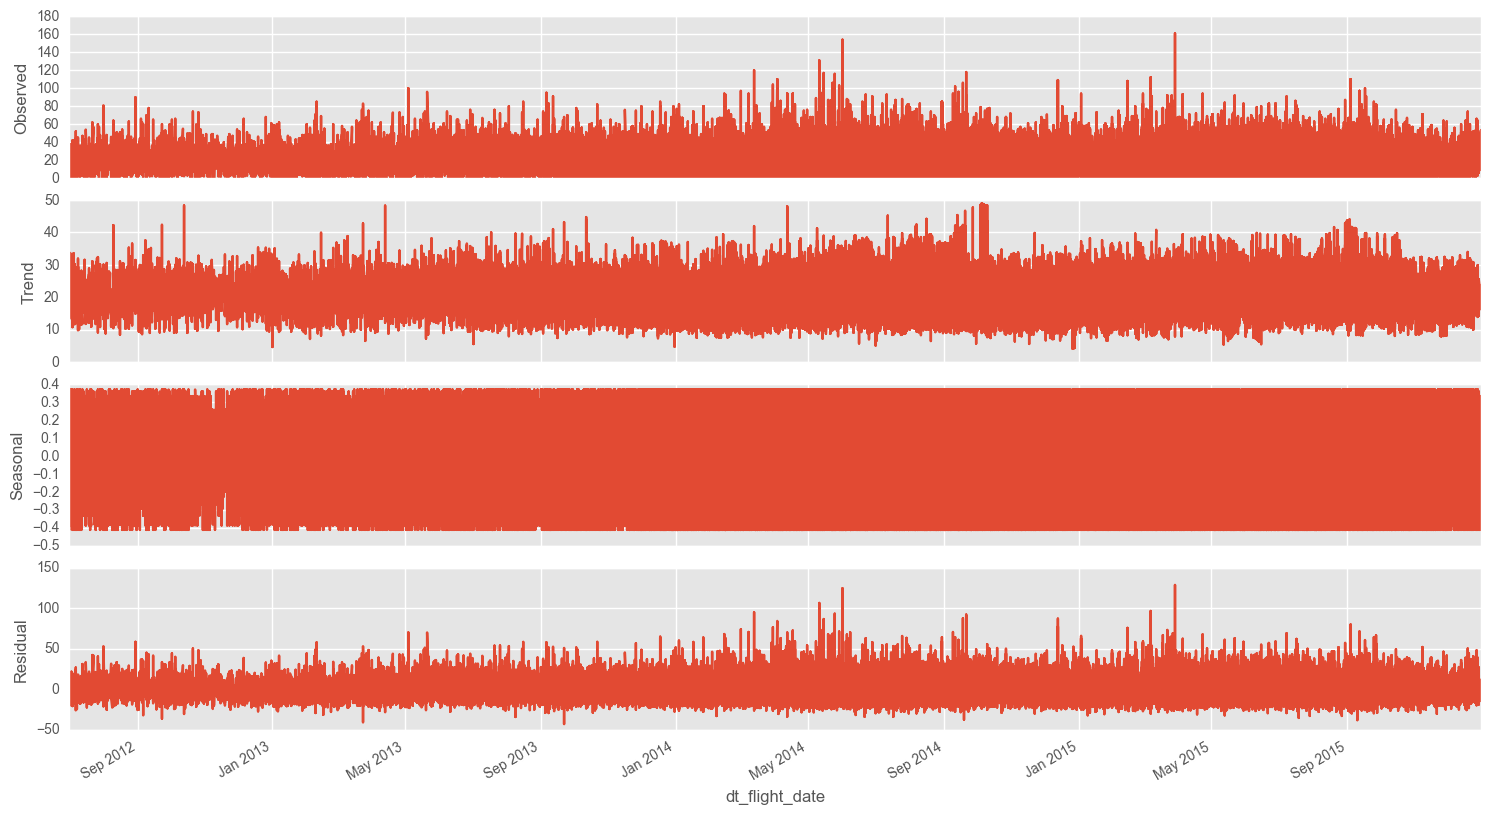

In [33]:
decomposition = seasonal_decompose(df.num_pax_090_104_mins_before_sdt,model='additive', freq=30)
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)